In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import string 
#from string import ascii_lowercase
from itertools import combinations

In [18]:
import lightgbm as lgb

from lightgbm import LGBMClassifier

from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

In [20]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test_x.csv')

In [21]:
eda_train = train.copy()

In [23]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

<AxesSubplot:>

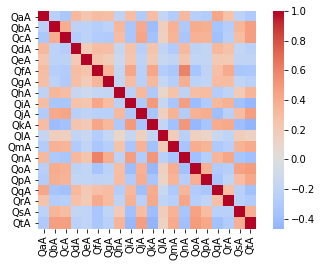

In [27]:
correlations = eda_train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [35]:
for col in Answers:
    print(col, sorted(eda_train[col].unique()))

QaA [1.0, 2.0, 3.0, 4.0, 5.0]
QbA [1.0, 2.0, 3.0, 4.0, 5.0]
QcA [1.0, 2.0, 3.0, 4.0, 5.0]
QdA [1.0, 2.0, 3.0, 4.0, 5.0]
QeA [1.0, 2.0, 3.0, 4.0, 5.0]
QfA [1.0, 2.0, 3.0, 4.0, 5.0]
QgA [1.0, 2.0, 3.0, 4.0, 5.0]
QhA [1.0, 2.0, 3.0, 4.0, 5.0]
QiA [1.0, 2.0, 3.0, 4.0, 5.0]
QjA [1.0, 2.0, 3.0, 4.0, 5.0]
QkA [1.0, 2.0, 3.0, 4.0, 5.0]
QlA [1.0, 2.0, 3.0, 4.0, 5.0]
QmA [1.0, 2.0, 3.0, 4.0, 5.0]
QnA [1.0, 2.0, 3.0, 4.0, 5.0]
QoA [1.0, 2.0, 3.0, 4.0, 5.0]
QpA [1.0, 2.0, 3.0, 4.0, 5.0]
QqA [1.0, 2.0, 3.0, 4.0, 5.0]
QrA [1.0, 2.0, 3.0, 4.0, 5.0]
QsA [1.0, 2.0, 3.0, 4.0, 5.0]
QtA [1.0, 2.0, 3.0, 4.0, 5.0]


In [36]:
flipping_colums = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_colums:
    eda_train[flip] = 6 - eda_train[flip]

<AxesSubplot:>

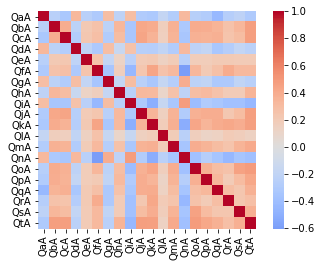

In [37]:
correlations = eda_train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [52]:
eda_train['delay'] = 0
for i in list(string.ascii_lowercase)[:20]:
    eda_train['delay'] = eda_train['delay'] + eda_train['Q'+i+'E']
eda_train

C:\Users\okso6\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\okso6\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay', ylabel='Density'>

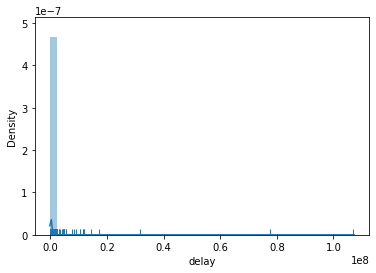

In [63]:
sns.distplot(eda_train.delay, rug = True)

C:\Users\okso6\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\okso6\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


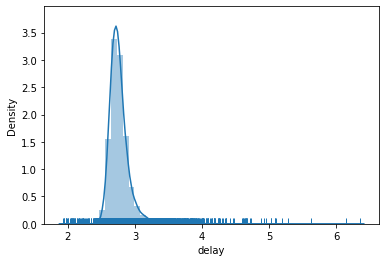

In [66]:
sns.distplot(eda_train['delay'] ** (1/10), rug = True)
eda_train['delay'] = eda_train['delay'] ** (1/10)

C:\Users\okso6\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\okso6\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay', ylabel='Density'>

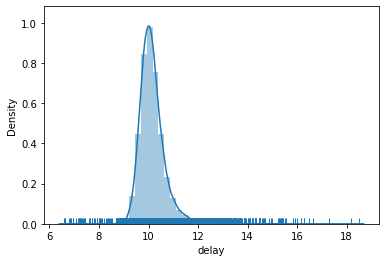

In [61]:
sns.distplot(np.log1p(eda_train['delay']), rug = True)

In [64]:
voted = eda_train[eda_train['voted'] == 1]
unvoted = eda_train[eda_train['voted'] == 2]

In [69]:
x_train = train.copy()
x_train.drop('voted', axis=1, inplace=True)
y_train = train['voted']

In [70]:
dataset = [x_train, test]

In [72]:
questions = [i for i in list(string.ascii_lowercase)[:20]]
answers = [('Q'+i+'A') for i in questions]

In [76]:
for data in dataset:
    data['T'] = data['QcA'] - data['QfA'] + data['QoA'] - data['QrA'] + data['QsA']
    data['V'] = data['QbA'] - data['QeA'] + data['QhA'] + data['QjA'] + data['QmA'] - data['QqA']
    data['M'] = - data['QkA']

In [77]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for data in dataset:
    for flip in flipping_columns: 
        data[flip] = 6 - data[flip]

In [78]:
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for data in dataset:
    for flip in flipping_secret_columns: 
        data[flip] = 6 - data[flip]

In [79]:
for data in dataset:
    data['Mach_score'] = data[answers].mean(axis = 1)

In [80]:
for data in dataset:
    data['delay'] = data[[('Q'+i+'E') for i in questions]].sum(axis=1)
    data['delay'] = data['delay'] ** (1/10)

In [81]:
Ancoms = list(combinations(answers, 2))
for data in dataset:
    for a,b in Ancoms:
        data['%s_dv_%s'%(a,b)] = data[a]/data[b]

In [82]:
for data in dataset:
    data.drop([('Q'+i+'A') for i in questions], axis = 1, inplace = True)
    data.drop([('Q'+i+'E') for i in questions], axis = 1, inplace = True)

In [85]:
for data in dataset:
    data.drop('hand', axis=1, inplace = True)

In [86]:
wr_list = [('wr_0'+str(i)) for i in range(1,10)]
wr_list.extend([('wr_'+str(i)) for i in range(10,14)])
wr_no_need = [i for i in wr_list if i not in ['wr_01', 'wr_03', 'wr_06', 'wr_09', 'wr_11']]

In [87]:
for data in dataset:
    data.drop(wr_no_need, axis=1, inplace = True)

In [88]:
for data in dataset:
    data['Ex'] = data['tp01']-data['tp06']
    data['Ag'] = data['tp07']-data['tp02']
    data['Con'] = data['tp03']-data['tp08']
    data['Es'] =data['tp09']-data['tp04']
    data['Op'] =data['tp05']-data['tp10']

In [89]:
for data in dataset:
    data.drop([('tp0'+str(i)) for i in range(1,10)], axis=1, inplace = True)
    data.drop('tp10', axis = 1, inplace = True)

In [90]:
index = test['index']
for data in dataset:
    data.drop('index', axis = 1, inplace = True)

In [91]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
needenco = ['age_group', 'gender', 'race', 'religion']
for i in needenco:
    x_train[i] = encoder.fit_transform(x_train[i])
    test[i] = encoder.transform(test[i])

In [92]:
k_fold = KFold(n_splits = 3, shuffle = True, random_state = 0)

In [ ]:
clf1 = RandomForestClassifier(n_estimators=500)
clf2 = LGBMClassifier()
clf3 = GradientBoostingClassifier()
soft_vote  = VotingClassifier([('r1',clf1), ('r2', clf2), ('r3',clf3)], voting='soft')
soft_vote.fit(x_train, y_train)

In [ ]:
model = soft_vote
pred_y = model.predict_proba(test)
pred_y = pred_y[:,1]

submission = pd.DataFrame({
    "index" : index,
    "voted" : pred_y
})
submission.to_csv('../data/model1.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import eli5
from eli5.sklearn import PermutationImportance